In [1]:
DATA_PATH = r'/home/luis-felipe/Uncertainty_Estimation/data'
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = r'/home/luis-felipe/Uncertainty_Estimation/torch_models'
PATH_trainer = r'/home/luis-felipe/Uncertainty_Estimation/torch_models/trainer'

In [2]:
import os
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from collections import defaultdict

In [3]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


In [4]:
import NN_models as models
import NN_utils as utils
import NN_utils.train_and_eval as TE
import cifar_data

In [5]:
from uncertainty.MonteCarlo_Dropout import MonteCarloDropout
from uncertainty.ensemble import Ensemble
import uncertainty.metrics as metrics
from uncertainty import TestAugmentation as _TTA
from uncertainty.MCBN import MonteCarloBatchNormalization as MCBN

In [6]:
N_ENS = 4
model_path = PATH_MODELS
MODEL_ARC = 'VGG_16'
DATA = 'Cifar100'
NAME = 'VGG16_100_ensemble_0.pt'#MODEL_ARC +'_' + DATA 

data = cifar_data.__dict__[DATA](data_dir = DATA_PATH)
model_class = models.__dict__[MODEL_ARC]

model_path = PATH_MODELS#os.path.join(PATH_MODELS,MODEL_ARC)
weights_path = os.path.join(model_path,NAME)

Files already downloaded and verified
Files already downloaded and verified


## um

In [7]:
model = model_class(num_classes = data.n_classes)
model.eval()
model.softmax = True
state_dict = torch.load(weights_path)
model.load_state_dict(state_dict)
TE.model_acc(model,data.test_dataloader)

71.51

In [8]:
model_mcbn = MCBN(model,N_ENS,data.train_dataloader,as_ensemble = True).to(dev)
model_mcbn.eval()
TE.model_acc(model_mcbn,data.test_dataloader)

72.6

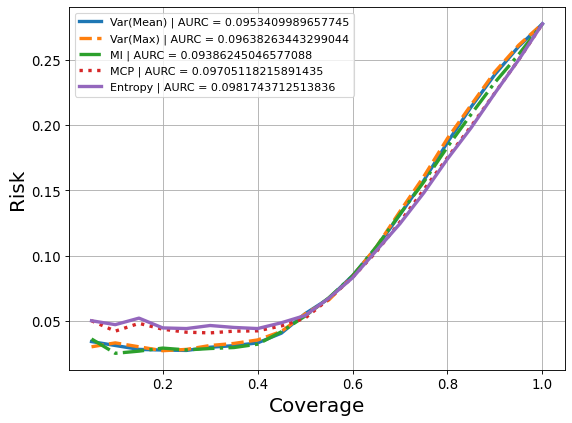

In [9]:
RC = metrics.selective_metrics(model_mcbn,data.test_dataloader, c_list = np.arange(0.05,1.05,0.05))
RC.plot_RC(aurc = True)

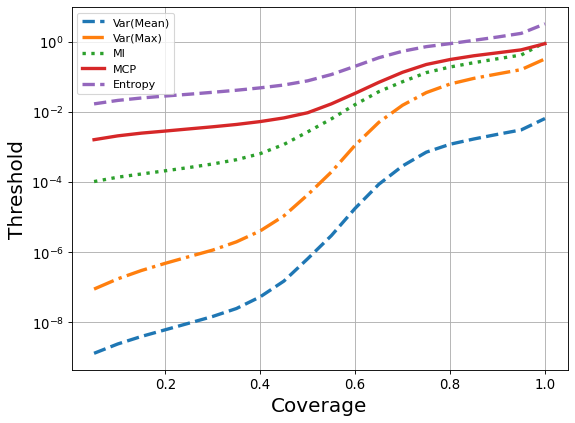

In [10]:
RC.plot_thresholds(normalize = False)
plt.yscale('log')

## todos

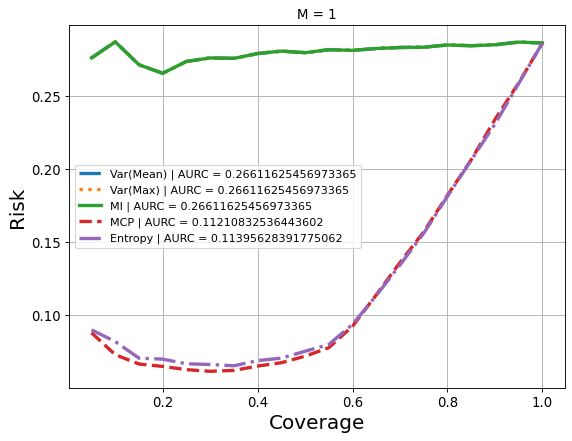

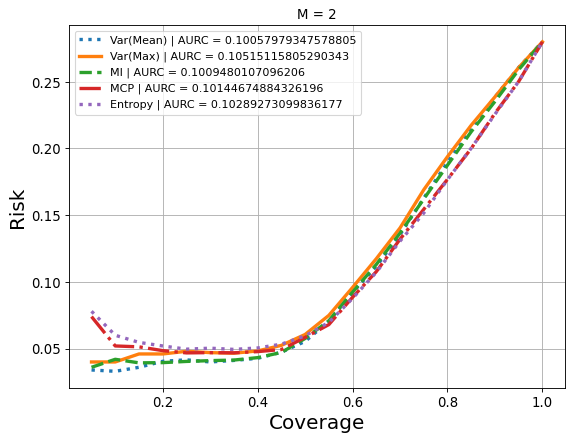

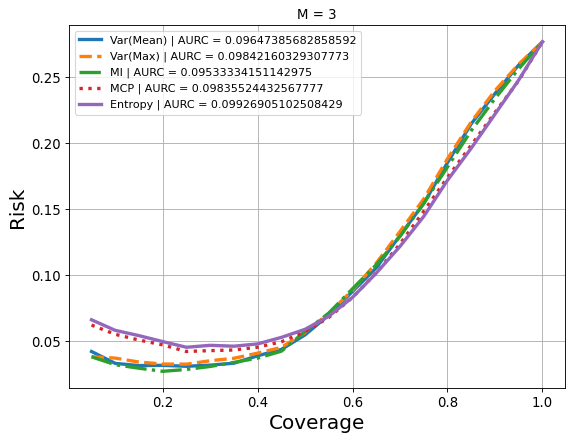

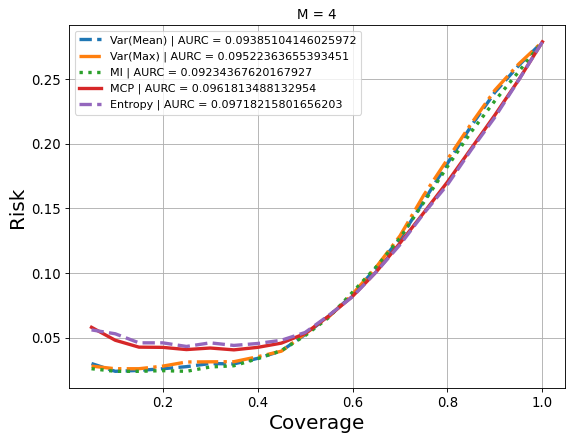

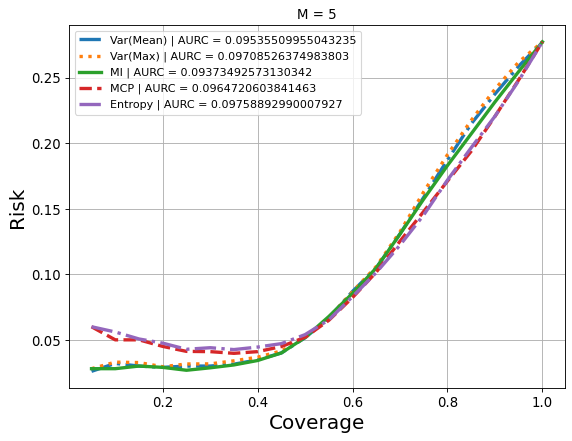

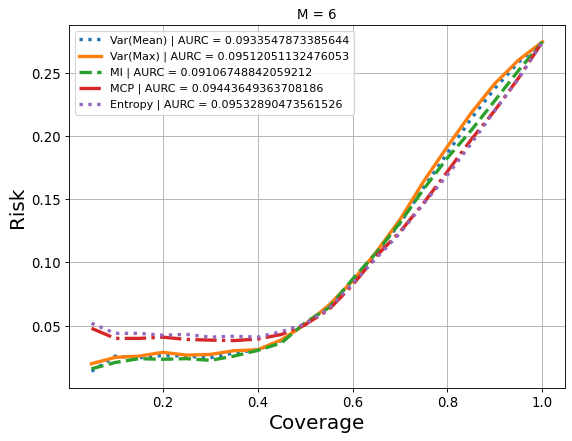

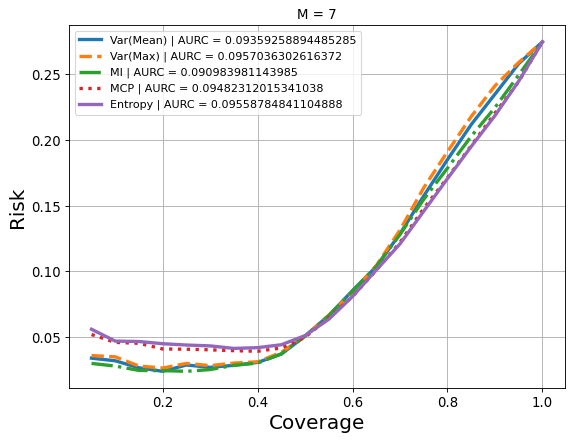

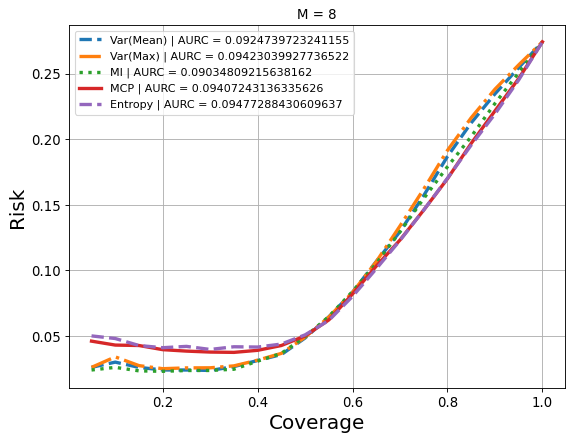

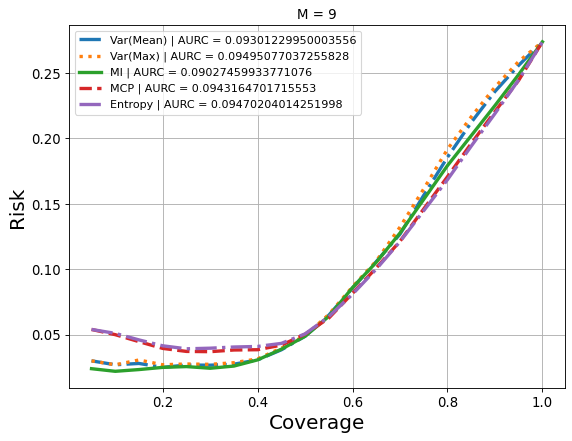

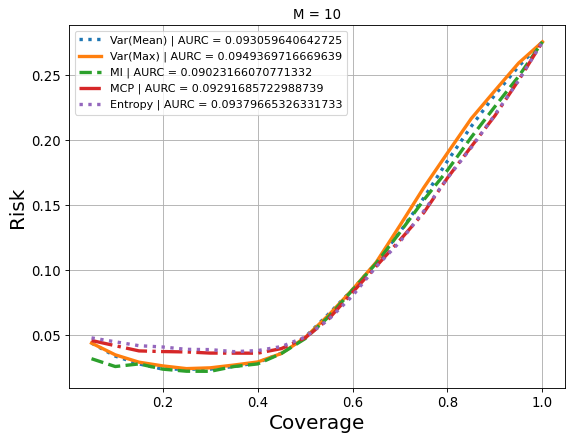

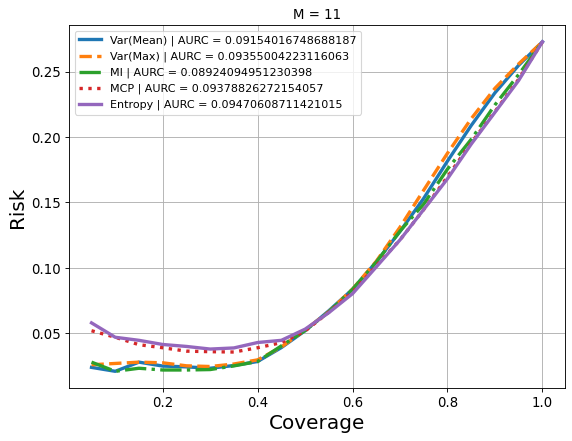

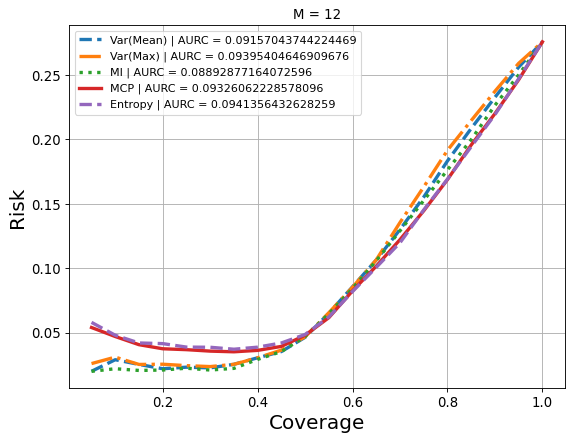

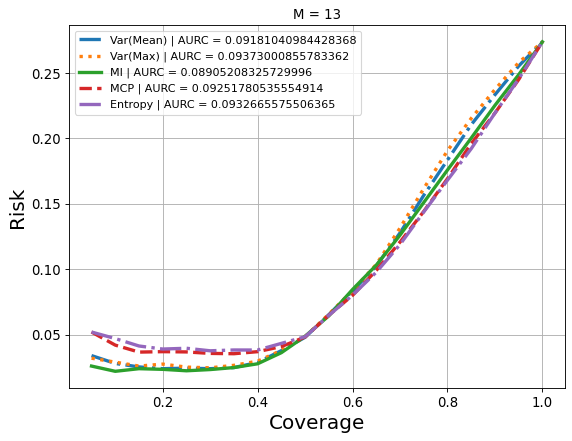

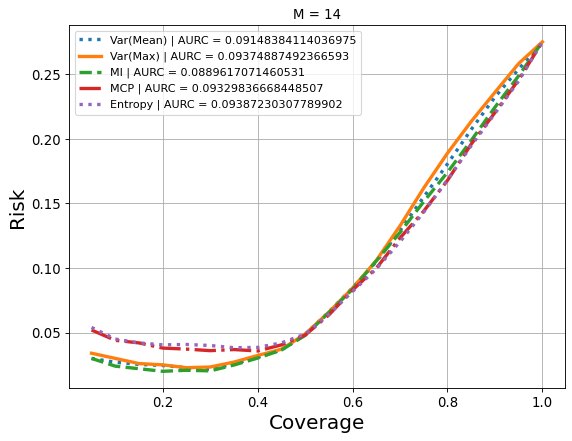

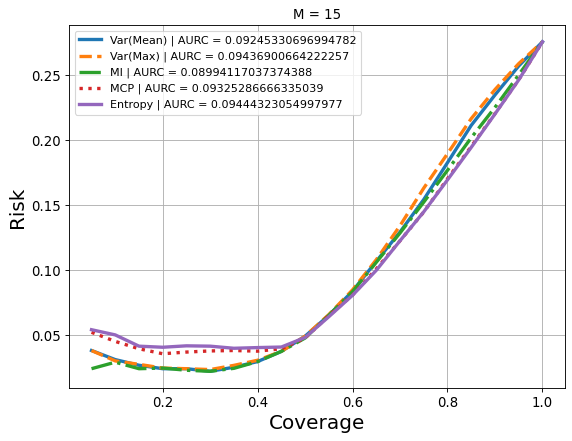

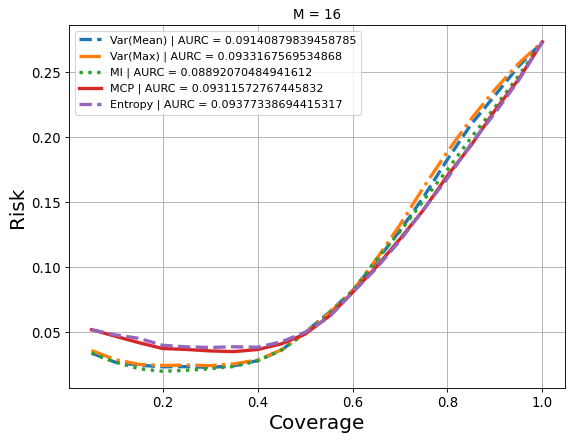

KeyboardInterrupt: 

In [11]:
for N_ENS in range(1,20):
    model_mcbn = MCBN(model,N_ENS,data.train_dataloader,as_ensemble = True).to(dev)
    TE.model_acc(model_mcbn,data.test_dataloader, set_eval = False)
    RC = metrics.selective_metrics(model_mcbn,data.test_dataloader, c_list = np.arange(0.05,1.05,0.05))
    RC.plot_RC(aurc = True)
    plt.title(f'M = {N_ENS}')
    plt.show()

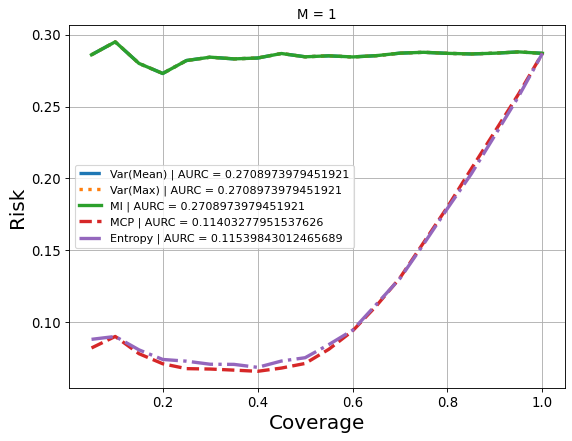

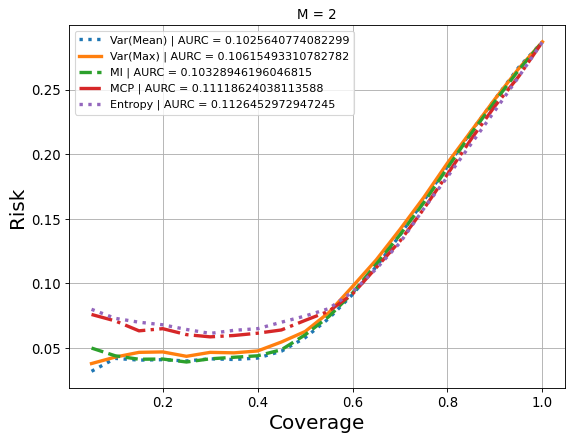

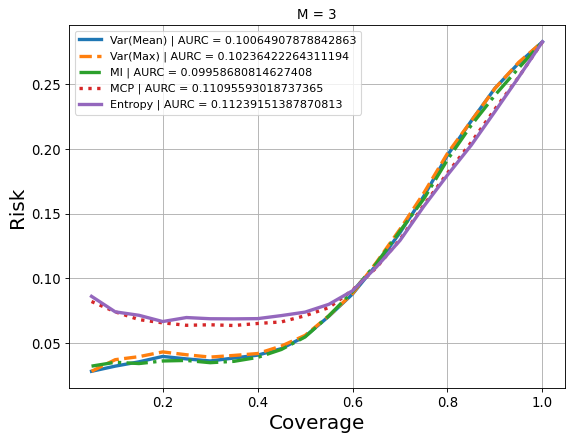

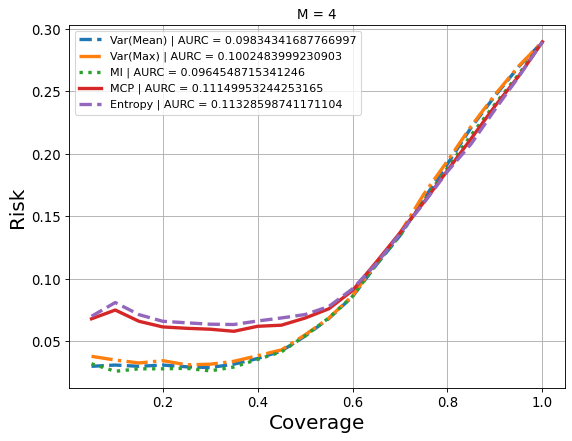

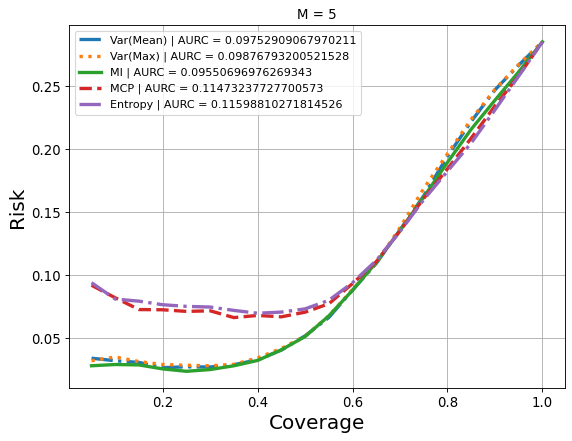

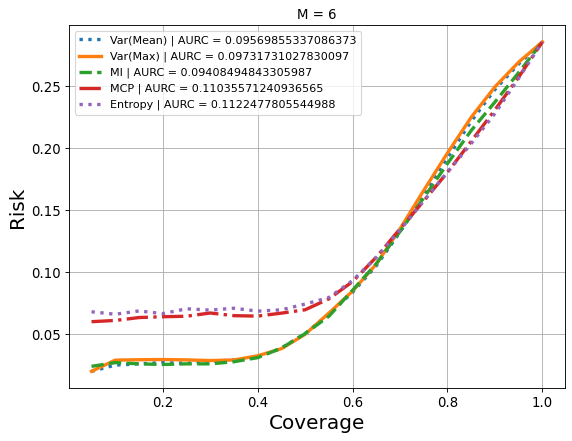

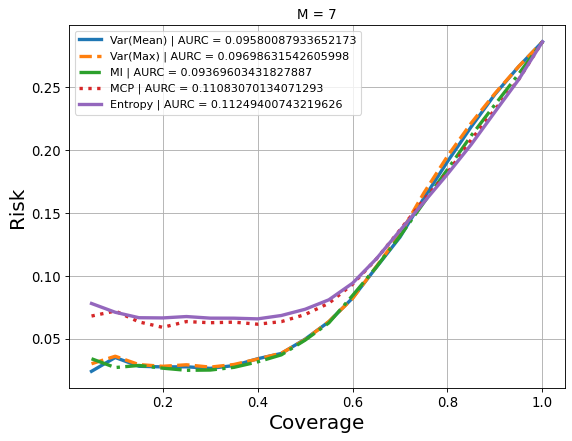

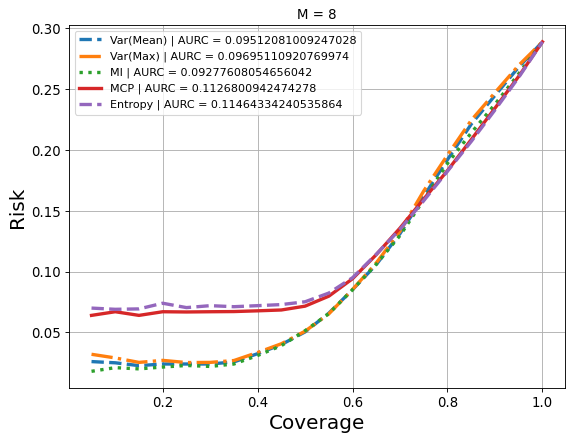

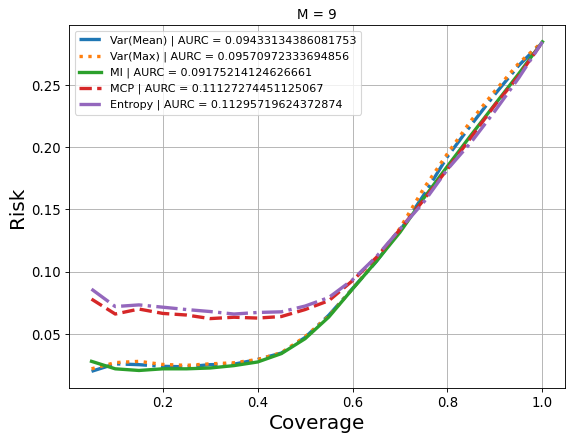

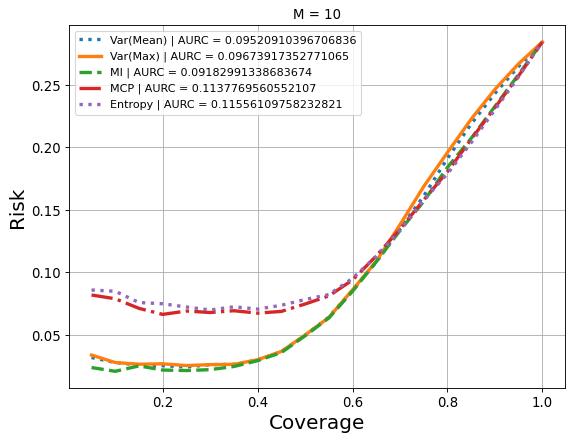

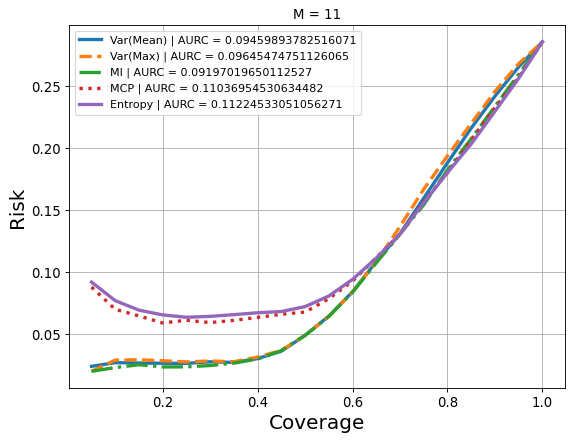

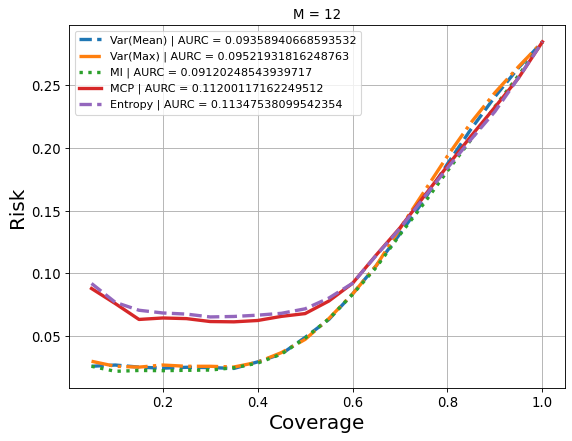

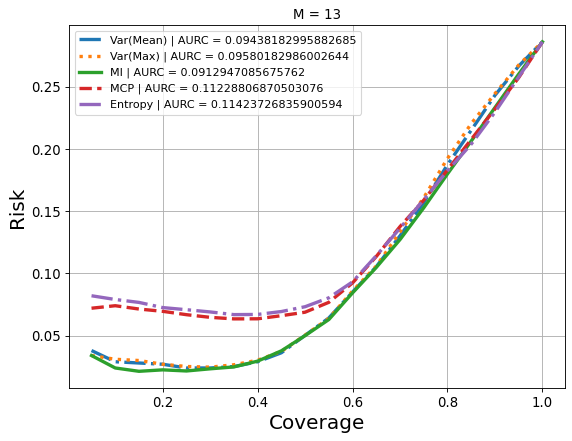

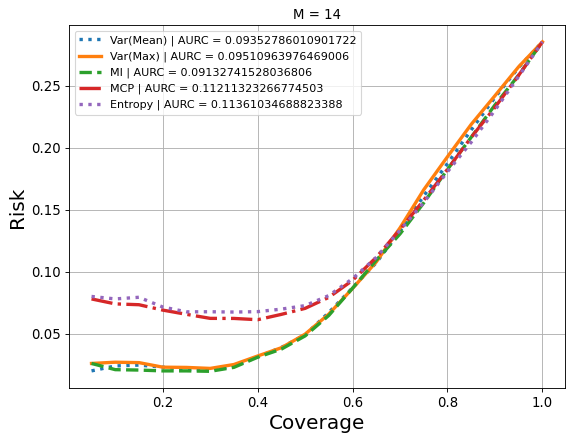

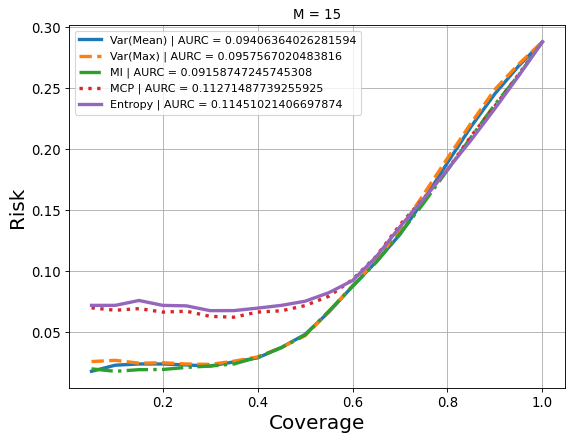

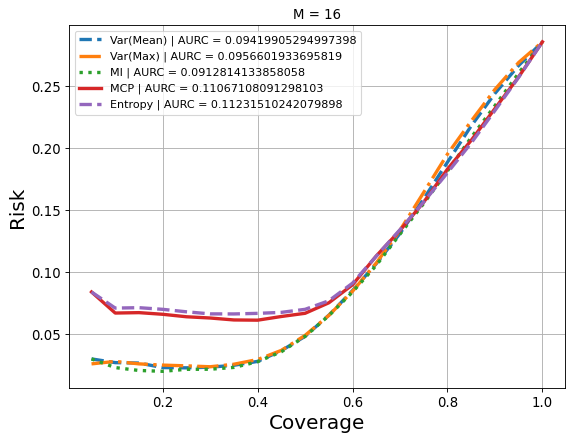

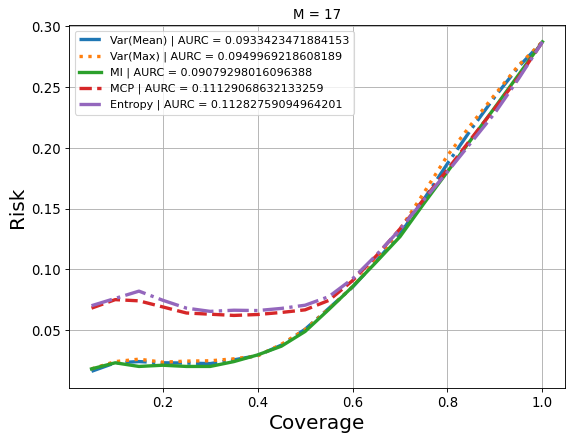

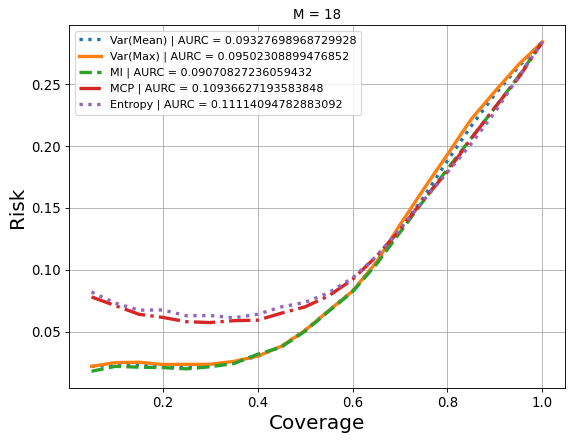

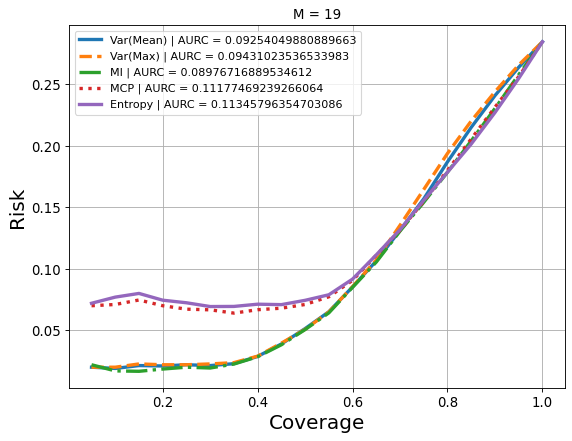

In [12]:
for N_ENS in range(1,20):
    model_mcbn = MCBN(model,N_ENS,data.train_dataloader,as_ensemble = False).to(dev)
    TE.model_acc(model_mcbn,data.test_dataloader, set_eval = False)
    RC = metrics.selective_metrics(model_mcbn,data.test_dataloader, c_list = np.arange(0.05,1.05,0.05))
    RC.plot_RC(aurc = True)
    plt.title(f'M = {N_ENS}')
    plt.show()